In [1]:
# load movies_model
# load posters
# load movies_test data

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

from keras import models
from keras.preprocessing import image
import tensorflow as tf
from sklearn.metrics import confusion_matrix

import os

### Load Models

In [3]:
movies_model_path = 'data/movies_models/samuel_movies1533444486.458372.h5'
images_model_path = 'data/aws_models/samuel_images_model_1533409854.5854547.h5'

movies_model = models.load_model(movies_model_path)
images_model = models.load_model(images_model_path)

### Load Test Data

In [4]:
x = pd.read_csv('data/movies_x_test.csv')
y = pd.read_csv('data/movies_y_test.csv', header=None)

### Get Poster Function

In [5]:
posters_dir = 'data/posters'

posters_by_movie_id = {}
LIMIT = 10

def load_image(movie_id):
    if movie_id in posters_by_movie_id:
        return posters_by_movie_id[movie_id]

    filename = '{}.jpg'.format(movie_id)
    img_path = os.path.join(posters_dir, filename)
    
    posters_by_movie_id[movie_id] = image.load_img(img_path, target_size=(224, 224))
    return posters_by_movie_id[movie_id]

def image_to_array(img):
    img = image.img_to_array(img)
    img = img.reshape((1,) + img.shape)
    img = img / 255.
    return img

In [6]:
def predict_samuel_poster(movie_id):
    img = load_image(movie_id)
    img_array = image_to_array(img)
    
    
    prob = images_model.predict_proba(img_array)
    
    if prob > .99:
        plt.imshow(img)
        plt.show()
        return False
    elif prob < .001:
        #print('samuel')
        return True
    else:
        return None

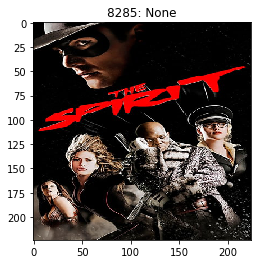

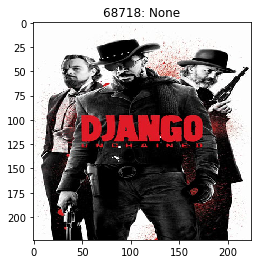

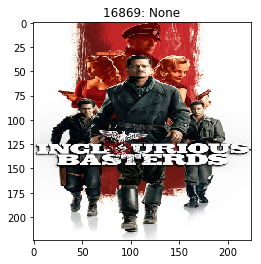

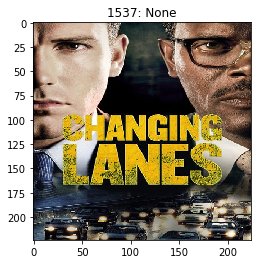

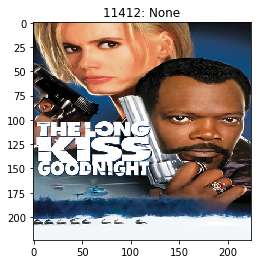

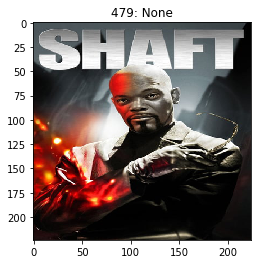

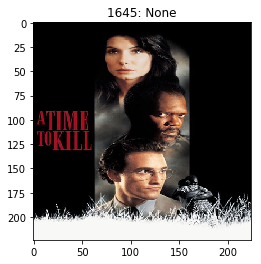

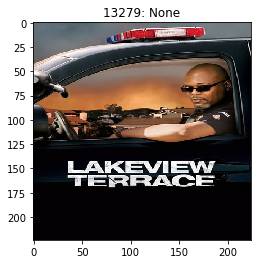

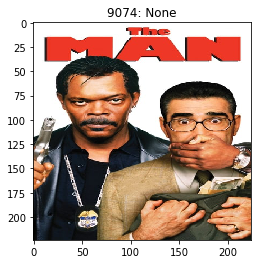

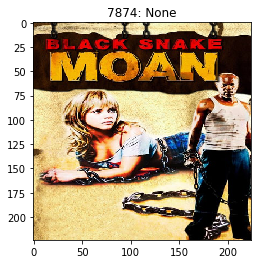

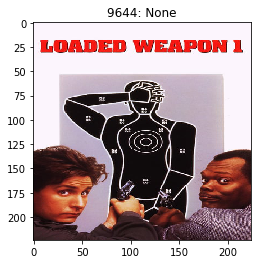

11      8285
118    68718
168    16869
209     1537
480    11412
481      479
482     1645
483    13279
484     9074
485     7874
486     9644
Name: id, dtype: int64


In [7]:
def show_img(id):
    predict = predict_samuel_poster(id)
    plt.title('{}: {}'.format(id, predict))
    plt.imshow(load_image(id))
    plt.show()

ids_with_samuel = x.id[y[0]]
[show_img(id) for id in ids_with_samuel]
print(ids_with_samuel)

In [8]:
def predict_samuel_movie(movie):
    prediction = movies_model.predict_classes([movie])
    return prediction[0][0] != 0

In [9]:
def predict_samuel_ensemble(movies):
    predictions_map = {
        'yes': [],
        'no': [],
    }
    predictions = []
    for index, row in movies.iterrows():
        id = int(row['id'])
        del row['id']
        del row['Samuel L. Jackson - 2231 (actor)']
        
        prediction = predict_samuel_poster(id)
        #prediction = None
        
        if prediction is None:
            prediction = predict_samuel_movie([row.values])
        
        predictions.append(prediction)

        if prediction:
            predictions_map['yes'].append(id)
        elif not prediction:
            predictions_map['no'].append(id)
        else:
            print(type(prediction))
            print('unknown predict {}'.format(prediction))
    return pd.DataFrame({'predictions': predictions})

In [10]:
predictions = predict_samuel_ensemble(x)

In [11]:
predictions

,predictions
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [12]:
# actuals
x[y[0]].id

11      8285
118    68718
168    16869
209     1537
480    11412
481      479
482     1645
483    13279
484     9074
485     7874
486     9644
Name: id, dtype: int64

In [13]:
%run -i confusion_matrix.py

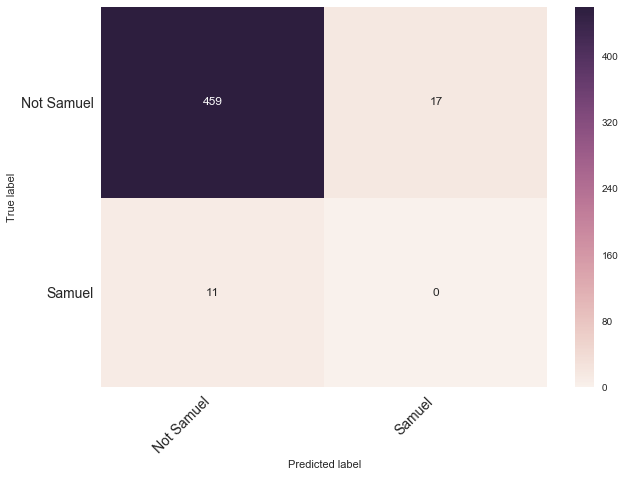

In [16]:
cm = confusion_matrix(y.values.flatten(), predictions.predictions)
print_confusion_matrix(cm, ['Not Samuel','Samuel'])

In [18]:
accuracy_score(y, predictions)

0.9425051334702259

In [28]:
float(len(y[y == False])) / float(len(y))

1.0

In [39]:
len(y[(y == False).values.flatten()]) \
/ float(len(y))

0.9774127310061602